# Importing the data set


In [ ]:
#not working, no idea why
!wget --no-check-certificate --output-document=data1.csv 'https://docs.google.com/spreadsheets/d/1xwqwqGPRb0-5XfcTbnQHNk45ylAq-_vWjgRNxiQELY8/edit?usp=sharing'

--2021-05-06 15:11:08--  https://docs.google.com/spreadsheets/d/1xwqwqGPRb0-5XfcTbnQHNk45ylAq-_vWjgRNxiQELY8/edit?usp=sharing
Resolving docs.google.com (docs.google.com)... 173.194.79.113, 173.194.79.102, 173.194.79.100, ...
Connecting to docs.google.com (docs.google.com)|173.194.79.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&continue=https://docs.google.com/spreadsheets/d/1xwqwqGPRb0-5XfcTbnQHNk45ylAq-_vWjgRNxiQELY8/edit?usp%3Dsharing&followup=https://docs.google.com/spreadsheets/d/1xwqwqGPRb0-5XfcTbnQHNk45ylAq-_vWjgRNxiQELY8/edit?usp%3Dsharing&ltmpl=sheets [following]
--2021-05-06 15:11:10--  https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&continue=https://docs.google.com/spreadsheets/d/1xwqwqGPRb0-5XfcTbnQHNk45ylAq-_vWjgRNxiQELY8/edit?usp%3Dsharing&followup=https://docs.google.com/spreadsheets/d/1xwqwqGPRb0-5XfcTbnQHNk45ylAq-_vWjgRNxiQELY8/ed

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data1.csv to data1 (2).csv


In [ ]:
!head data1\ \(1\).csv #check what we downloaded

SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE
364029,1,Cash loans,M,Y,Y,2,180000,514777.5,31621.5,477000,Unaccompanied,Commercial associate,Higher education,Married,House / apartment
234494,0,Cash loans,F,Y,Y,1,337500,599778,26419.5,477000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment
316252,0,Cash loans,F,N,N,0,202500,1133748,36571.5,990000,Unaccompanied,Commercial associate,Higher education,Married,House / apartment
343511,0,Cash loans,M,N,Y,3,360000,675000,32602.5,675000,Unaccompanied,Commercial associate,Higher education,Married,House / apartment
230444,0,Cash loans,F,Y,Y,0,225000,640080,31261.5,450000,Unaccompanied,Commercial associate,Higher education,Married,House / apartment
389381,0,Cash loans,F,N,N,2,180000,922266,47218.5,810000,Unaccompanied,W

In [ ]:
import pandas as pd

customer_data = pd.read_csv('data1 (1).csv')

## Checking data


In [ ]:
customer_data.dtypes #variable list/types

SK_ID_CURR               int64
TARGET                   int64
NAME_CONTRACT_TYPE      object
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
AMT_CREDIT             float64
AMT_ANNUITY            float64
AMT_GOODS_PRICE        float64
NAME_TYPE_SUITE         object
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
dtype: object

In [ ]:
customer_data.describe() #generate descriptive stats

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
count,20000.000000,20000.000000,20000.000000,2.000000e+04,2.000000e+04,20000.000000,1.998000e+04
mean,279645.009050,0.081950,0.417950,1.693126e+05,6.005793e+05,27263.969775,5.393956e+05
std,102653.096521,0.274295,0.731707,1.037967e+05,4.027532e+05,14678.395935,3.694733e+05
min,100146.000000,0.000000,0.000000,2.655000e+04,4.500000e+04,2317.500000,4.050000e+04
25%,191141.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16573.500000,2.385000e+05
50%,280035.500000,0.000000,0.000000,1.440000e+05,5.177880e+05,25191.000000,4.500000e+05
75%,368902.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34956.000000,6.795000e+05
max,456251.000000,1.000000,14.000000,3.600000e+06,3.600000e+06,225000.000000,3.600000e+06


## Data cleaning

In [ ]:
## Create a dataframe with continuous columns 
df_cont = customer_data.select_dtypes(include = ['int64','float64'])
## Create a dataframe with categorical columns 
df_cat = customer_data.select_dtypes(include =['object'])

## Missing value handling

In [ ]:
#import required libraries
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import seaborn as sns
import numpy as np


,Total,Percent
AMT_GOODS_PRICE,20,0.001
AMT_ANNUITY,0,0.000
AMT_CREDIT,0,0.000
AMT_INCOME_TOTAL,0,0.000
CNT_CHILDREN,0,0.000
TARGET,0,0.000
SK_ID_CURR,0,0.000


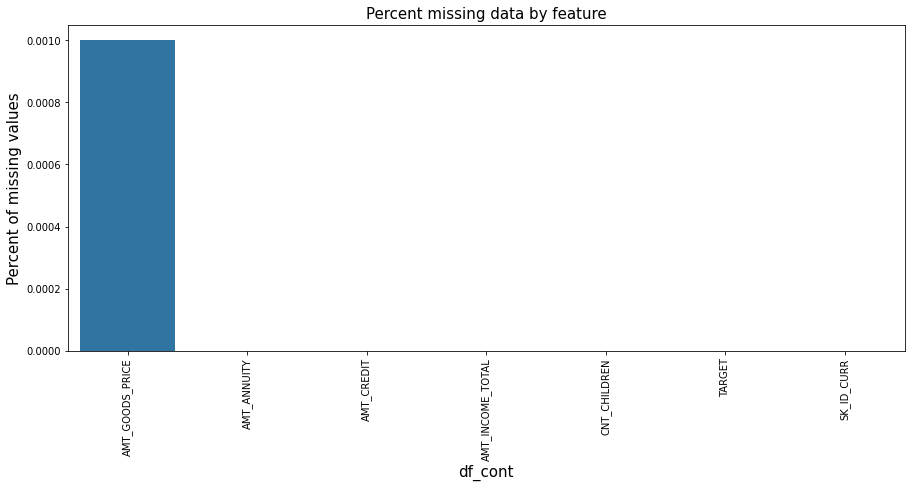

In [ ]:
#?failed? attempt to visualize % of missing values in each variable 
total = df_cont.isnull().sum().sort_values(ascending=False)
percent = df_cont.isnull().sum()/df_cont.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('df_cont', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data
#acording to this code there are are essentially 0 missing values (only 0.001% of AMT_GOODS_PRICE are missing)


# Histograms


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

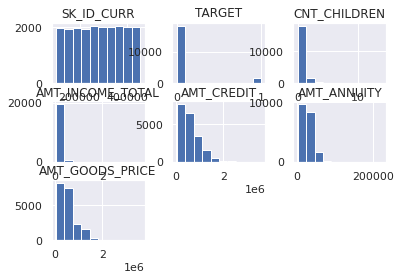

In [ ]:

histograms = customer_data.hist() 

In [ ]:
import seaborn as sns
import numpy as np


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: ignored

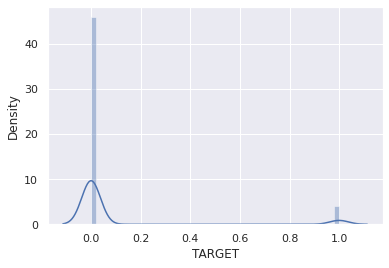

In [ ]:
sns.set(color_codes=True)

for col_id in customer_data.columns[np.r_[1,2:16]]: 
    sns.distplot(customer_data[col_id])

In [ ]:
np.r_[1,3:18]

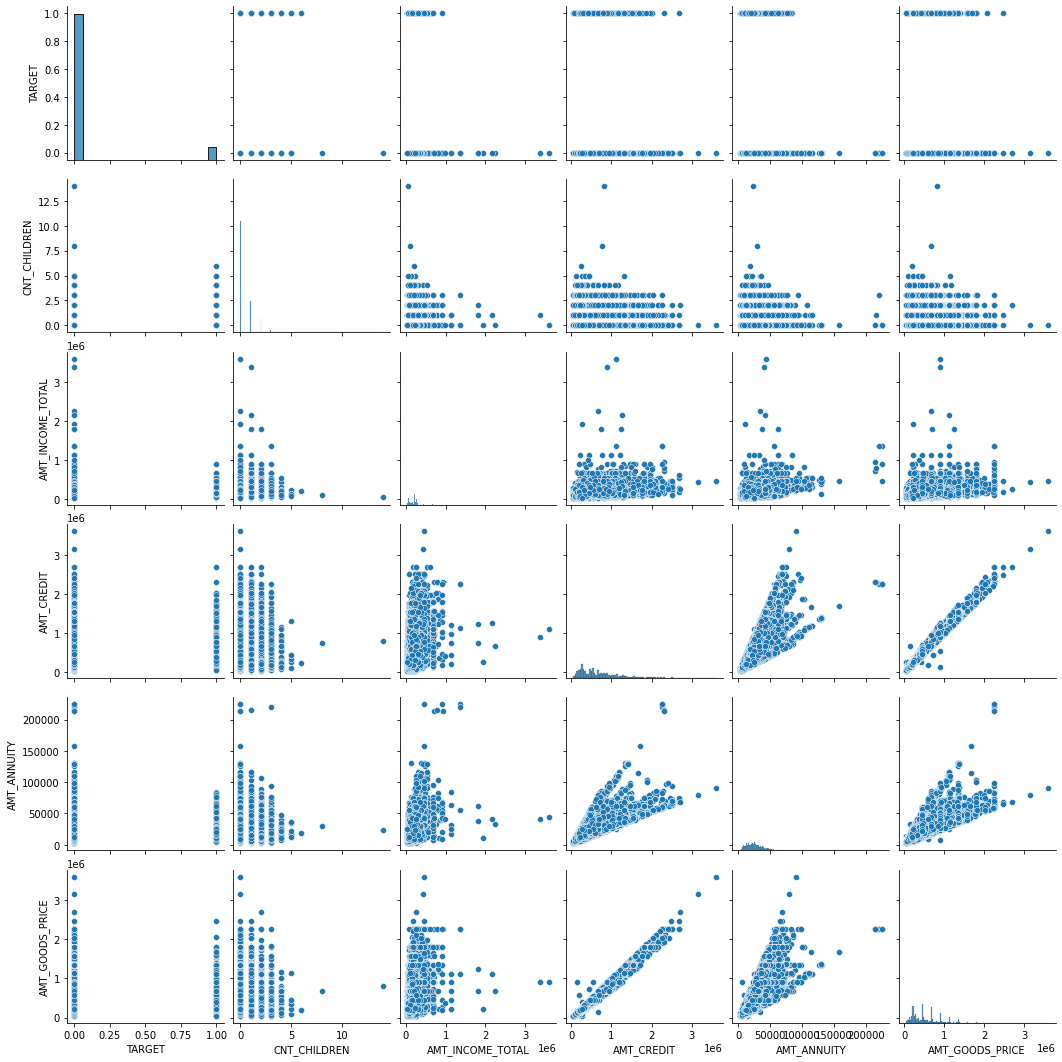

In [ ]:
sns.pairplot(customer_data.iloc[:,1:-5])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


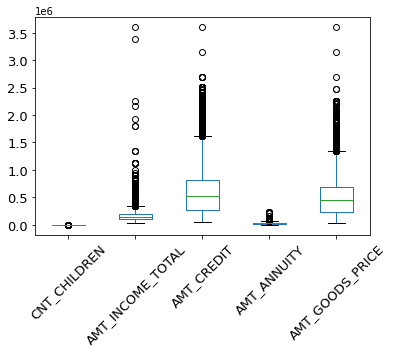

In [ ]:
#visualizing above using a boxplot instead of histogram. Index :,6:-4] = only look at the numeric variables in the table, e.g income, credit, annuity, goods price. Ignore Target as Target is esssentially default
box = customer_data.iloc[:,6:-4].boxplot(grid=False, rot=45, fontsize=13)

## Outlier Handling

plotting distplots of boxplots above with outlier issues for visualization

In [ ]:
sns.distplot(customer_data['AMT_INCOME_TOTAL'])

In [ ]:
sns.distplot(customer_data['AMT_CREDIT'])

In [ ]:
sns.distplot(customer_data['AMT_GOODS_PRICE'])

setting appropriate cutoffs given the distplots where results are negligible.

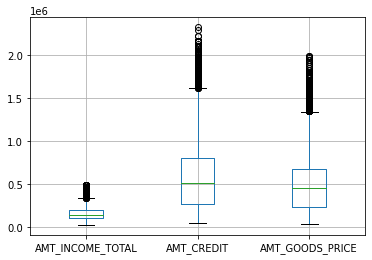

In [ ]:
customer_data_filtered = customer_data.loc[
    (customer_data['AMT_INCOME_TOTAL'] < 0.5 * 1e06) &
    (customer_data['AMT_CREDIT'] < 2.5 * 1e06) &
    (customer_data['AMT_GOODS_PRICE'] < 2.0 * 1e06)
]

customer_data_filtered[[
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_GOODS_PRICE',
]].boxplot()

## Normalization

In [ ]:
from scipy.stats import zscore

In [ ]:
#Identify numerical columns
numeric_cols = customer_data.select_dtypes(include=[np.number]).columns
numeric_cols 

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'],
      dtype='object')

In [ ]:
#Remove ID & target variables
numeric_cols = numeric_cols[1: 2]

In [ ]:
#apply zscore function to data
customer_data_filtered[numeric_cols] = customer_data_filtered[numeric_cols].apply(zscore)

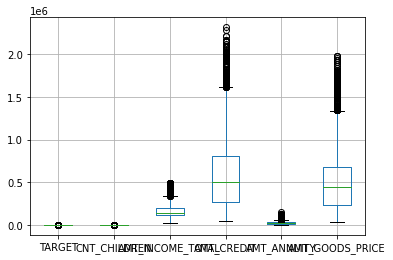

In [ ]:
customer_data_filtered.iloc[:,1:].boxplot()

# Encoding object variables 

## Object variable counts (to check options for integer assignment)

In [ ]:
#create dataframe with only object variables with default categories 
obj_df = customer_data.select_dtypes(include=['object']).copy()
obj_df.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE
0,Cash loans,M,Y,Y,Unaccompanied,Commercial associate,Higher education,Married,House / apartment
1,Cash loans,F,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment
2,Cash loans,F,N,N,Unaccompanied,Commercial associate,Higher education,Married,House / apartment
3,Cash loans,M,N,Y,Unaccompanied,Commercial associate,Higher education,Married,House / apartment
4,Cash loans,F,Y,Y,Unaccompanied,Commercial associate,Higher education,Married,House / apartment


In [ ]:
obj_df.dtypes

NAME_CONTRACT_TYPE     object
CODE_GENDER             int64
FLAG_OWN_CAR            int64
FLAG_OWN_REALTY         int64
NAME_TYPE_SUITE        object
NAME_INCOME_TYPE       object
NAME_EDUCATION_TYPE    object
NAME_FAMILY_STATUS     object
NAME_HOUSING_TYPE      object
dtype: object

In [ ]:
obj_df["NAME_CONTRACT_TYPE"].value_counts()

Cash loans         18131
Revolving loans     1869
Name: NAME_CONTRACT_TYPE, dtype: int64

In [ ]:
obj_df["CODE_GENDER"].value_counts()

2    13169
1     6831
Name: CODE_GENDER, dtype: int64

In [ ]:
obj_df["FLAG_OWN_CAR"].value_counts()

0    13229
1     6771
Name: FLAG_OWN_CAR, dtype: int64

In [ ]:
obj_df["FLAG_OWN_REALTY"].value_counts()

1    13948
0     6052
Name: FLAG_OWN_REALTY, dtype: int64

In [ ]:
obj_df["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      16199
Family              2577
Spouse, partner      712
Children             211
Other_B              131
Other_A               56
Group of people       19
Name: NAME_TYPE_SUITE, dtype: int64

In [ ]:
obj_df["NAME_INCOME_TYPE"].value_counts()

NameError: ignored

In [ ]:
obj_df["NAME_EDUCATION_TYPE"].value_counts()

Secondary / secondary special    14217
Higher education                  4892
Incomplete higher                  645
Lower secondary                    233
Academic degree                     13
Name: NAME_EDUCATION_TYPE, dtype: int64

In [ ]:
obj_df["NAME_FAMILY_STATUS"].value_counts()

Married                 12789
Single / not married     2974
Civil marriage           1899
Separated                1281
Widow                    1057
Name: NAME_FAMILY_STATUS, dtype: int64

In [ ]:
obj_df["NAME_HOUSING_TYPE"].value_counts()

House / apartment      17863
With parents             932
Municipal apartment      663
Rented apartment         316
Office apartment         160
Co-op apartment           66
Name: NAME_HOUSING_TYPE, dtype: int64

In [ ]:
obj_df["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      16199
Family              2577
Spouse, partner      712
Children             211
Other_B              131
Other_A               56
Group of people       19
Name: NAME_TYPE_SUITE, dtype: int64

## Recode / assign integer values to object categories

In [ ]:
#assign integer values to categories 
Object_Replace = {"CODE_GENDER":     {"M": 1, "F": 2},
                  "FLAG_OWN_CAR":{"Y": 1, "N": 0},
                  "FLAG_OWN_REALTY":{"Y": 1, "N": 0}}
        

In [ ]:
Object2_Replace = {"NAME_TYPE_SUITE":  {"Unaccompanied": 1, "Family ": 2, "Spouse, partner": 3, "Children": 4, "Other_B ": 5, "Other_A": 6,"Group of people": 7,}}

In [ ]:
obj_df = obj_df.replace(Object_Replace)
obj_df.head()

TypeError: ignored

"NAME_TYPE_SUITE":{"Unaccompanied": 1, "Family ": 2, "Spouse, partner": 3, "Children": 4, "Other_B ": 5, "Other_A": 6,"Group of people": 7,},
                  "NAME_INCOME_TYPE":{"Working": 1, "Commercial associate": 2, "Pensioner": 3, "Civil servant": 4, "Unemployed": 5},
                  }
                
  "NAME_EDUCATION_TYPE":{"Y": 1, "N": 0},
                  "NAME_FAMILY_STATUS":{"Y": 1, "N": 0},
                  "NAME_HOUSING_TYPE":{"Y": 1, "N": 0},
                  
                  

In [ ]:
new_df = df_obj["NAME_CONTRACT_TYPE"] = obj_df["NAME_CONTRACT_TYPE"].apply(lambda col:pd.Categorical(col.codes))

AttributeError: ignored